In [1]:
#coding:utf-8
import csv
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import pandas as pd


In [2]:
YH_df = pd.read_csv("tweet/2018-05-08/yawatahama_2018-05-08.csv", sep = '\t', encoding='utf-16')

In [3]:
YH_df.head()

,Unnamed: 0,created_at,text,retweet
0,0,Mon May 07 21:31:27 +0000 2018,愛媛県八幡浜市に新しい宿泊施設が誕生！コワーキングスペースを併設した、大人と子どものヒミツキ...,False
1,1,Mon May 07 20:23:56 +0000 2018,八幡浜でポルトガルの成果を披露です！\r\n\r\n見せる時\r\nhttps://t.co...,False
2,2,Mon May 07 18:20:24 +0000 2018,RT @tosa_akio: 愛媛県、道の駅『八幡浜 みなっと』。(横は、すぐ海🌊)\r\n...,True
3,3,Mon May 07 16:44:49 +0000 2018,【送料無料地域】内子、長浜、肱川、四国カルスト、八幡浜、宇和、野村、鬼北、愛南 https:...,False
4,4,Mon May 07 16:40:07 +0000 2018,中央区で不倫希望中 [41歳/男性]！愛媛県八幡浜登録で恋人急募中 [27歳/女性]と楽しめ...,False


In [4]:
df_new = YH_df[YH_df['text'].notnull()]

In [5]:
# extract noun and count them
def counter(texts):
    t = Tokenizer()
    words_count = defaultdict(int)
    words = []
    for text in texts:
        tokens = t.tokenize(text)
        for token in tokens:
            #品詞から名詞だけ抽出
            pos = token.part_of_speech.split(',')[0]
            if pos == '名詞':
                words_count[token.base_form] += 1
                words.append(token.base_form)
    return words_count, words

In [6]:
# with open('./file_name','r') as f:
#     reader = csv.reader(f, delimiter='\t')
#     texts = []
#     for row in reader:
#         text = row[0].split('http')
#         texts.append(text[0])

texts = df_new['text'].str.replace('http\S+', '', case=False)
words_count, words = counter(texts)
text = ' '.join(words)

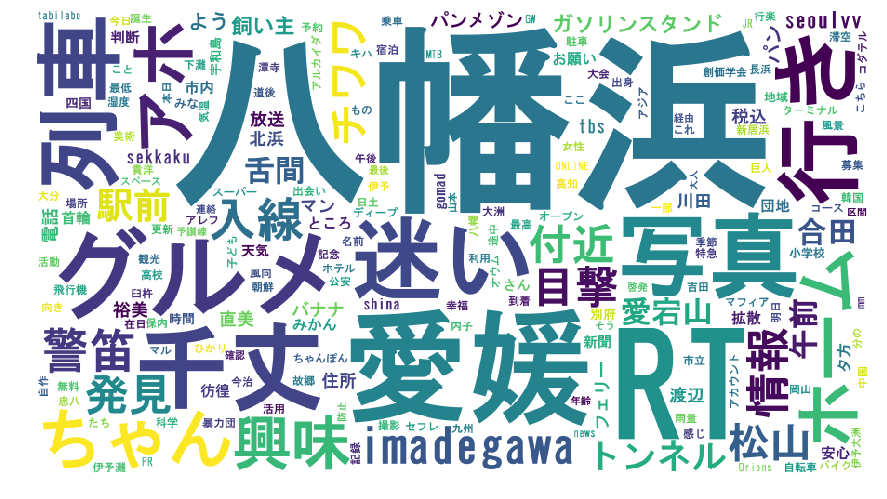

In [7]:
#text_new = text.decode('utf-8') 

#fpath = "/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
fpath = "C:\Windows\Fonts\HGRGE.TTC"
#word cloud
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()